# Convolutional Neural Nets

In [1]:
# Import Libraries
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) =  keras.datasets.cifar10.load_data() # load data

In [3]:
X_train.shape, X_test.shape # 32 * 32 pixels with tensor 3(RGB)

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
y_train = y_train.reshape(-1,) # flattening out the array

Display Image

In [5]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "house",
           "ship", "truck"]

In [6]:
def number(index):
    print(index)
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    print("---" * 15)
    print(f"The image is {classes[y_train[index]]}")
    print("---" * 15)

12540
---------------------------------------------
The image is airplane
---------------------------------------------


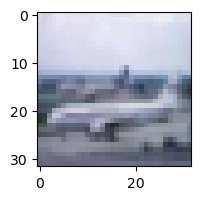

In [7]:
import random
index = random.randrange(0, 50000)
number(index)

Data Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=51, test_size=0.1)

In [9]:
X_train.shape, X_val.shape

((45000, 32, 32, 3), (5000, 32, 32, 3))

Converting labels into a 1D array

In [10]:
# y_train = y_train.reshape(-1,)

In [10]:
y_val = y_val.reshape(-1,)

In [11]:
y_test = y_test.reshape(-1,)

Normalization

In [12]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [13]:
X_train[0].shape

(32, 32, 3)

ANN

In [14]:
i = layers.Input(shape=(32, 32, 3))

x = layers.Flatten()(i)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(10, activation="softmax")(x)

model = keras.models.Model(i, x)

In [15]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [16]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), batch_size=256)

Epoch 1/5
176/176 [==============================] - 1s 5ms/step - loss: 2.0917 - accuracy: 0.2345 - val_loss: 2.0437 - val_accuracy: 0.2724
Epoch 2/5
176/176 [==============================] - 1s 4ms/step - loss: 1.8884 - accuracy: 0.3176 - val_loss: 1.8203 - val_accuracy: 0.3562
Epoch 3/5
176/176 [==============================] - 1s 4ms/step - loss: 1.8107 - accuracy: 0.3483 - val_loss: 1.8582 - val_accuracy: 0.3244
Epoch 4/5
176/176 [==============================] - 1s 4ms/step - loss: 1.7631 - accuracy: 0.3637 - val_loss: 1.7765 - val_accuracy: 0.3700
Epoch 5/5
176/176 [==============================] - 1s 4ms/step - loss: 1.7304 - accuracy: 0.3804 - val_loss: 1.7689 - val_accuracy: 0.3754


In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 905us/step - loss: 1.7384 - accuracy: 0.3793


[1.7383798360824585, 0.37929999828338623]

CNN

In [19]:
i = layers.Input(shape=(32, 32, 3))

x = layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3), padding="same")(i)
x = layers.Dropout(0.2)(x)
x = layers.MaxPool2D((2,2))(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.Dropout(0.5)(x)
x = layers.MaxPool2D((2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(10, activation="softmax")(x)

model = keras.models.Model(i, x)

In [23]:
# model = keras.Sequential([
#     layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3), padding="same"),
#     layers.Dropout(0.2),
#     layers.MaxPool2D((2,2)),
#     layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
#     layers.Dropout(0.5),
#     layers.MaxPool2D((2,2)),
#     layers.Flatten(),
#     layers.Dense(64, activation="relu"),
#     layers.Dense(10, activation="softmax")
# ])

In [20]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [21]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=256)

Epoch 1/10
176/176 [==============================] - 42s 237ms/step - loss: 1.7075 - accuracy: 0.3906 - val_loss: 1.6089 - val_accuracy: 0.4838
Epoch 2/10
176/176 [==============================] - 48s 275ms/step - loss: 1.3246 - accuracy: 0.5308 - val_loss: 1.4318 - val_accuracy: 0.5642
Epoch 3/10
176/176 [==============================] - 47s 268ms/step - loss: 1.1898 - accuracy: 0.5844 - val_loss: 1.3613 - val_accuracy: 0.5820
Epoch 4/10
176/176 [==============================] - 55s 313ms/step - loss: 1.1053 - accuracy: 0.6137 - val_loss: 1.2545 - val_accuracy: 0.6188
Epoch 5/10
176/176 [==============================] - 51s 291ms/step - loss: 1.0447 - accuracy: 0.6370 - val_loss: 1.2060 - val_accuracy: 0.6430
Epoch 6/10
176/176 [==============================] - 43s 242ms/step - loss: 0.9949 - accuracy: 0.6531 - val_loss: 1.1746 - val_accuracy: 0.6538
Epoch 7/10
176/176 [==============================] - 44s 247ms/step - loss: 0.9551 - accuracy: 0.6666 - val_loss: 1.1348 - val_ac

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 1.0310 - accuracy: 0.6923


[1.0309988260269165, 0.692300021648407]